In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy import stats
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

Contando cuantos elementos hay en el dataset *iris*

In [ ]:
# Cargar el dataset IRIS
df = pd.read_csv('resources/iris.csv')
print(len(df))
print(df.head())

150
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


Eliminación de valores atípicos

In [5]:
# Seleccionar solo las columnas numéricas
numeric_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Calcular IQR
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Filtrar filas sin outliers
df_clean = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | 
                (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Filas originales: {len(df)}, Filas después de limpieza: {len(df_clean)}")

Filas originales: 150, Filas después de limpieza: 146


Estandarizar variables independientes

In [6]:
# Estandarizar (media=0, desviación=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean[numeric_cols])
X_scaled = pd.DataFrame(X_scaled, columns=numeric_cols)

# Verificar
print(X_scaled.mean(), X_scaled.std(), sep="\n")

sepal_length    7.300097e-16
sepal_width    -7.300097e-17
petal_length    9.733462e-17
petal_width    -3.406712e-16
dtype: float64
sepal_length    1.003442
sepal_width     1.003442
petal_length    1.003442
petal_width     1.003442
dtype: float64


# Analisis de normalidad

A) Shapiro-wilk

In [7]:
for col in numeric_cols:
    stat, p = stats.shapiro(X_scaled[col])
    print(f"{col}: p-valor = {p:.4f} (Normalidad {'aceptada' if p > 0.05 else 'rechazada'})")

sepal_length: p-valor = 0.0142 (Normalidad rechazada)
sepal_width: p-valor = 0.0607 (Normalidad aceptada)
petal_length: p-valor = 0.0000 (Normalidad rechazada)
petal_width: p-valor = 0.0000 (Normalidad rechazada)


B) QQ-plots

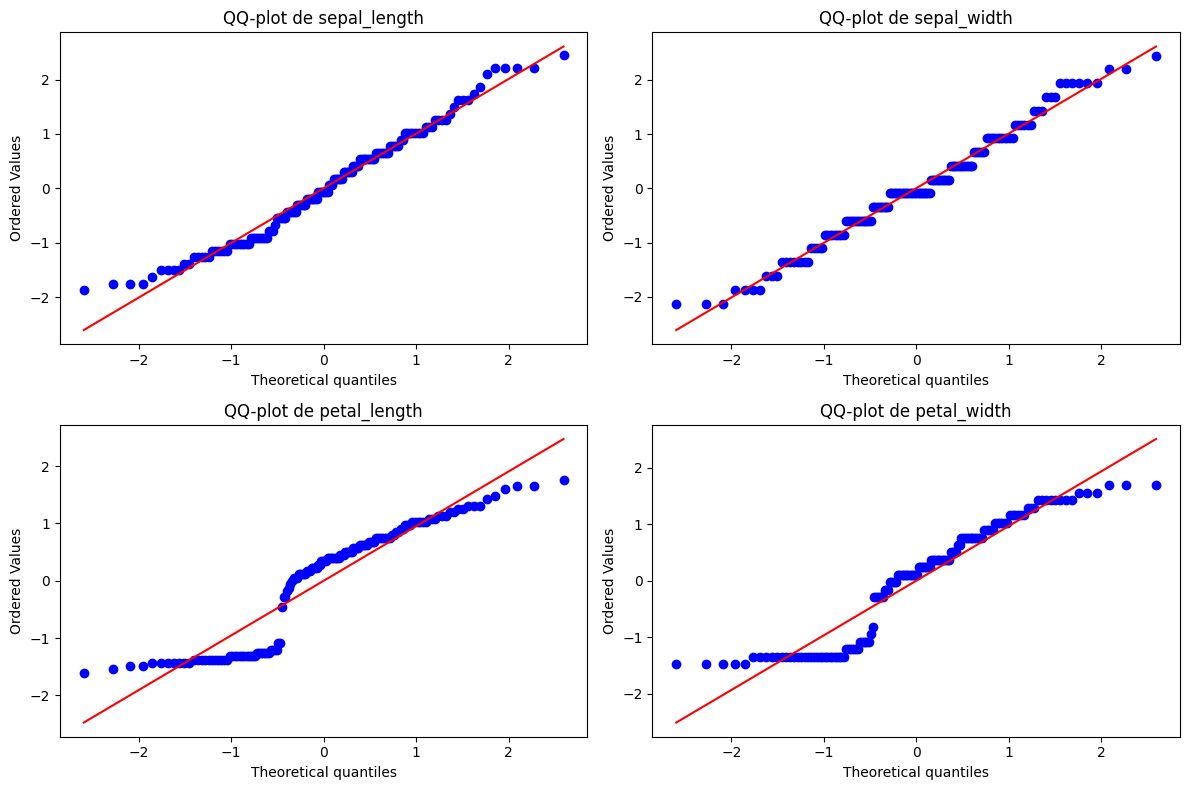

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for i, col in enumerate(numeric_cols):
    stats.probplot(X_scaled[col], plot=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f"QQ-plot de {col}")
plt.tight_layout()
plt.show()

# 5. Análisis de multicoleanidad

a) Matriz de correlación